# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

# Data loading

In [2]:
absenteeism_at_work = pd.read_csv("../../data/absenteeism-at-work/data.csv", delimiter=";", index_col="ID")
absenteeism_at_work

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
ID,,,,,,,,,,,,,,,,,,,,
11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,14,7,3,1,289,36,13,33,264.604,93,0,1,2,1,0,1,90,172,30,8
1,11,7,3,1,235,11,14,37,264.604,93,0,3,1,0,0,1,88,172,29,4
4,0,0,3,1,118,14,13,40,271.219,95,0,1,1,1,0,8,98,170,34,0


# Definition of domain knowledge
There are plenty of values encoded as integers, even if they have some categorical meaning. The following mappings are taken from the documentaton of the dataset

In [3]:
season_mapping = {
    1: "Summer",
    2: "Autumn",
    3: "Winter",
    4: "Spring"
}
weekday_mapping = {
    1: "Sunday",
    2: "Monday",
    3: "Tuesday",
    4: "Wednesday",
    5: "Thursday",
    6: "Friday",
    7: "Saturday"
}
month_mapping = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December"
}
education_mapping = {
    1: "High scool",
    2: "Graduate",
    3: "Postgraduate",
    4: "Master and doctor"
}
absence_reason_mapping = {
    0: "Unknown",
    1: "Infectious and parasitic",
    2: "Neoplasms",
    3: "Blood and blood-forming organ",
    4: "Endocrine, nutritional and metabolic",
    5: "Mental and behavioural disorders",
    6: "Nervous system",
    7: "Eye and adnexa",
    8: "Ear and mastoid process",
    9: "Circulatory system",
    10: "Respiratory system",
    11: "Digestive system",
    12: "Skin and subcutaneous tissue",
    13: "Musculoskeletal system",
    14: "Genitourinary system",
    15: "Pregnancy, childbirth and puerperium",
    16: "Perinatal period conditions",
    17: "Congenital malformations, deformations",
    18: "Abnormal clinical symptoms",
    19: "Injury, poisoning",
    20: "Morbidity and mortality ",
    21: "Health service encounters",
    22: "Patient follow-up",
    23: "Medical consultation",
    24: "Blood donation",
    25: "Laboratory examination",
    26: "Unjustified absence",
    27: "Physiotherapy",
    28: "Dental consultation"
}

# Analysis and visualizations

In [4]:
pd.DataFrame({
    "Column Name": absenteeism_at_work.columns,
    "Min value": absenteeism_at_work.min(),
    "Max value": absenteeism_at_work.max()
})

,Column Name,Min value,Max value
Reason for absence,Reason for absence,0.000,28.000
Month of absence,Month of absence,0.000,12.000
Day of the week,Day of the week,2.000,6.000
Seasons,Seasons,1.000,4.000
Transportation expense,Transportation expense,118.000,388.000
Distance from Residence to Work,Distance from Residence to Work,5.000,52.000
Service time,Service time,1.000,29.000
Age,Age,27.000,58.000
Work load Average/day,Work load Average/day,205.917,378.884
Hit target,Hit target,81.000,100.000


The dataset seems to be quite clean. There appear to be only some missing values that are encoded as zeros. At least the documentation does not include specification of any categorical values that is encoded as zero.
This is the case for:
- Reason for absence
- Month of absence

There are many entries that have a zero value for the absenteeism in hours. It is unclear wheter they mean "unknown" or whether they have some specific meaning. Since the feature is not categorical, this does not cause large issues when training. However, it is still probably noise in the data.

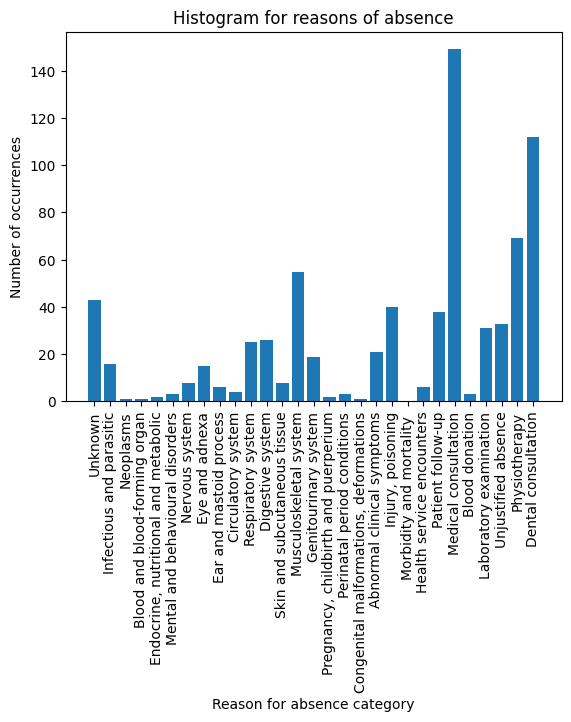

In [5]:
plt.title("Histogram for reasons of absence")
plt.xlabel("Reason for absence category")
plt.ylabel("Number of occurrences")
plt.hist(absenteeism_at_work["Reason for absence"], bins=range(0, 30), align="left", rwidth=0.8)
plt.xticks(range(0, 29), [absence_reason_mapping[i] for i in range(0, 29)], rotation="vertical")
plt.show()

The target has many classes which very different numbers of occurrences. It can be seen that dental and medical consultations represent the majority of all instances. This seems quite realistic. The high number of absences, because of physiotherapy could be specific to mail couriers. It might be difficult to use models trained on this dataset for prediction of samples from other employers.

In [6]:
missing_values = absenteeism_at_work.isnull().values.any()
f"The data contains missing values: %s" %missing_values

'The data contains missing values: False'

# Data preprocessing

## Remove missing values

### Reason for absence
There are values marked as 0 which signals an unkown values. They could either be removed or explicitly encoded and kept as noise. Since many samples have the reason of absence 0, they are kept for training.

### Month of absence
Some months are encoded as 0, even though the range should be from 1 to 12

In [7]:
absenteeism_at_work.drop(absenteeism_at_work[absenteeism_at_work["Month of absence"] == 0].index, inplace=True)

## Map all booleans to their data type
Many variables are encoded as zeros and ones when they are booleans. To make the dataset more descriptive and prevent classifiers interpreting the features as continuous values they are mapped to bool types.

In [8]:
boolean_columns = ["Disciplinary failure", "Social drinker", "Social smoker"]

In [9]:
absenteeism_at_work[boolean_columns] = absenteeism_at_work[boolean_columns].astype(bool)

## Map categorical values to string representations
All classes are encoded as integers. Again, to prevent classifiers from learning some order between the individual classes, they can be mapped to their correct data type.

In [10]:
absenteeism_at_work["Day of the week"] = absenteeism_at_work["Day of the week"].replace(weekday_mapping).astype("category")
absenteeism_at_work["Month of absence"] = absenteeism_at_work["Month of absence"].replace(month_mapping).astype("category")
absenteeism_at_work["Seasons"] = absenteeism_at_work["Seasons"].replace(season_mapping).astype("category")
absenteeism_at_work["Education"] = absenteeism_at_work["Education"].replace(education_mapping).astype("category")
absenteeism_at_work["Reason for absence"] = absenteeism_at_work["Reason for absence"].replace(absence_reason_mapping).astype("category")

## Round workload to integer
This is absolutely not necessary. However, the dataset now consists only of categorical, integer and boolean features except for the work load average per day. There should be no harm in roundin the values.

In [11]:
absenteeism_at_work["Work load Average/day"] = absenteeism_at_work["Work load Average/day"].round(0).astype(int)

## Show preprocessed data
The result is a cleaned dataset where all features have their correct type. There are no redundancies, missing features etc. It should be interpretable by any model from the sklearn library, which is the one used here. One-hot encoding for categorical variables will be performed in the experiments sections. It is not done here, because it is not adding/changing any semantic meaning to the data and some classifier do this out of the box.

In [12]:
absenteeism_at_work

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
ID,,,,,,,,,,,,,,,,,,,,
11,Unjustified absence,July,Tuesday,Summer,289,36,13,33,240,97,False,High scool,2,True,False,1,90,172,30,4
36,Unknown,July,Tuesday,Summer,118,13,18,50,240,97,True,High scool,1,True,False,0,98,178,31,0
3,Medical consultation,July,Wednesday,Summer,179,51,18,38,240,97,False,High scool,0,True,False,0,89,170,31,2
7,Eye and adnexa,July,Thursday,Summer,279,5,14,39,240,97,False,High scool,2,True,True,0,68,168,24,4
11,Medical consultation,July,Thursday,Summer,289,36,13,33,240,97,False,High scool,2,True,False,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,Patient follow-up,July,Wednesday,Summer,361,52,3,28,265,93,False,High scool,1,True,False,4,80,172,27,8
28,Patient follow-up,July,Wednesday,Summer,225,26,9,28,265,93,False,High scool,1,False,False,2,69,169,24,8
13,Musculoskeletal system,July,Monday,Summer,369,17,12,31,265,93,False,High scool,3,True,False,0,70,169,25,80


# Experiments
The experiments are now performed on the cleaned datasets. In order to be able to compare the results, scaling and one-hot encoding is done for all experiments the same way. Also the same seed and test/train split is used.

One note about the used features:
It could be argued that the absenteeism time in hours should not be included in the dataset. This really depends on what the model should explain. The global parameter drop_features configures this part of the training.

## Global parameters

In [13]:
seed = 1183743
test_size = 0.2
shuffle_train_test = True
drop_features = ["Reason for absence", "Absenteeism time in hours"]
scaler = StandardScaler()
scale_features = ["Transportation expense", "Distance from Residence to Work", "Service time", "Age", "Work load Average/day", "Hit target", "Son", "Pet", "Weight", "Height", "Body mass index", "Absenteeism time in hours"]
category_encoder = OneHotEncoder()
category_features = ["Day of the week", "Month of absence", "Seasons", "Education", "Reason for absence"]

In [14]:
# ensure that dropped features are not encoded
scale_features = list(filter(lambda feature: feature not in drop_features, scale_features))
category_features = list(filter(lambda feature: feature not in drop_features, category_features))

In [33]:
scale_features

['Transportation expense',
 'Distance from Residence to Work',
 'Service time',
 'Age',
 'Work load Average/day',
 'Hit target',
 'Son',
 'Pet',
 'Weight',
 'Height',
 'Body mass index']

## Metrics function

In [15]:
def calculate_performance_metrics(y_test, y_pred, class_names=None):        
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    
    return pd.Series({
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })
    
def calculate_per_class_accuracy(y_test, y_pred, class_names=None):
    if class_names is None:
        class_names = y_test.unique()
        
    present_classes = list(filter(lambda name: y_test.str.contains(name).any(), class_names))
    
    cm = confusion_matrix(y_test, y_pred)
    accuracies = np.divide(cm.diagonal(), cm.sum(axis=1))
    
    return pd.Series(accuracies[~np.isnan(accuracies)], index=present_classes)

## Data

### Split features and target value

In [16]:
X = absenteeism_at_work.drop(drop_features, axis=1)
y = absenteeism_at_work["Reason for absence"]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, shuffle=shuffle_train_test)

### Additional preprocessing for training and evaluation

In [18]:
column_transformer = make_column_transformer(
    (scaler, scale_features),
    (category_encoder, category_features),
    remainder="passthrough"
)

X_train = pd.DataFrame(column_transformer.fit_transform(X_train), columns=column_transformer.get_feature_names_out())
X_test = pd.DataFrame(column_transformer.transform(X_test), columns=column_transformer.get_feature_names_out())

## Random forest classifier

### Parameters

In [19]:
n_trees = 90

### Training

In [20]:
rf_classifier = RandomForestClassifier(n_estimators=n_trees, random_state=seed)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=90, random_state=1183743)

### Prediction

In [21]:
y_pred = rf_classifier.predict(X_test)

### Evaluation

In [22]:
calculate_performance_metrics(y_test, y_pred)

/home/tobsel/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tobsel/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy     0.331522
Precision    0.322665
Recall       0.331522
F1 Score     0.312193
dtype: float64

In [23]:
calculate_per_class_accuracy(y_test, y_pred, class_names=absence_reason_mapping.values())

/tmp/ipykernel_9297/2991757377.py:21: RuntimeWarning: invalid value encountered in divide
  accuracies = np.divide(cm.diagonal(), cm.sum(axis=1))


Unknown                                 0.125000
Infectious and parasitic                0.000000
Blood and blood-forming organ           0.681818
Endocrine, nutritional and metabolic    0.000000
Mental and behavioural disorders        0.000000
Nervous system                          0.000000
Eye and adnexa                          0.000000
Ear and mastoid process                 0.111111
Respiratory system                      0.000000
Digestive system                        0.000000
Skin and subcutaneous tissue            0.076923
Musculoskeletal system                  0.200000
Genitourinary system                    0.400000
Pregnancy, childbirth and puerperium    0.000000
Abnormal clinical symptoms              0.333333
Injury, poisoning                       0.200000
Health service encounters               0.181818
Patient follow-up                       0.555556
Medical consultation                    0.000000
Laboratory examination                  0.333333
Unjustified absence 

## K-neares neighbors

### Parameters

In [24]:
n_neighbors = 4

### Training

In [25]:
knn_classifier = KNeighborsClassifier(n_neighbors=n_neighbors)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

### Prediction

In [26]:
y_pred = knn_classifier.predict(X_test)

### Evaluation

In [27]:
calculate_performance_metrics(y_test, y_pred)

/home/tobsel/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tobsel/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy     0.277174
Precision    0.235118
Recall       0.277174
F1 Score     0.237398
dtype: float64

In [28]:
calculate_per_class_accuracy(y_test, y_pred, class_names=absence_reason_mapping.values())

/tmp/ipykernel_9297/2991757377.py:21: RuntimeWarning: invalid value encountered in divide
  accuracies = np.divide(cm.diagonal(), cm.sum(axis=1))


Unknown                                 0.375000
Infectious and parasitic                0.000000
Blood and blood-forming organ           0.772727
Endocrine, nutritional and metabolic    0.142857
Mental and behavioural disorders        0.000000
Nervous system                          0.000000
Eye and adnexa                          0.000000
Ear and mastoid process                 0.000000
Respiratory system                      0.000000
Digestive system                        0.000000
Skin and subcutaneous tissue            0.076923
Musculoskeletal system                  0.300000
Genitourinary system                    0.342857
Pregnancy, childbirth and puerperium    0.000000
Abnormal clinical symptoms              0.000000
Injury, poisoning                       0.000000
Health service encounters               0.272727
Patient follow-up                       0.888889
Medical consultation                    0.000000
Laboratory examination                  0.000000
Unjustified absence 

## SVM Classifier

### Parameters

### Training

In [29]:
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

SVC()

### Prediction

In [30]:
y_pred = svm_classifier.predict(X_test)

### Evaluation

In [31]:
calculate_performance_metrics(y_test, y_pred)

/home/tobsel/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy     0.288043
Precision    0.255435
Recall       0.288043
F1 Score     0.204382
dtype: float64

In [32]:
calculate_per_class_accuracy(y_test, y_pred, class_names=absence_reason_mapping.values())

Unknown                                 0.000000
Infectious and parasitic                0.000000
Blood and blood-forming organ           0.681818
Endocrine, nutritional and metabolic    0.000000
Mental and behavioural disorders        0.000000
Nervous system                          0.000000
Eye and adnexa                          0.000000
Ear and mastoid process                 0.000000
Respiratory system                      0.000000
Digestive system                        0.000000
Skin and subcutaneous tissue            0.000000
Musculoskeletal system                  0.100000
Genitourinary system                    0.714286
Pregnancy, childbirth and puerperium    0.000000
Abnormal clinical symptoms              0.111111
Injury, poisoning                       0.000000
Health service encounters               0.272727
Patient follow-up                       0.555556
Medical consultation                    0.000000
Laboratory examination                  0.000000
Unjustified absence 